# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Dataset Description 

- This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

-  A number of characteristics about the patient are included in each row. 
   * There are 110527 rows × 14 columns in the chosen dataset.
   * ‘ScheduledDay’ tells us on what day the patient set up their appointment.
   * ‘Neighborhood’ indicates the location of the hospital.
   * ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
   * Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment,                    and ‘Yes’ if they did not show up.
   * The name of all the availbale columns are, ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


#### Question for Analysis

From this dataset, we can solve different questions such as,
* Does the the appointment day and time affects the people to show up correctly on scheduled appointment?
* Is the health conditions is an important thing to attend or miss the appointment?
* What factors affect the people to attend their scheduled appointment?
* Which type gender fails the most to attend the appointment?

For analying the data, I have chosen the following question, 
* What factors affect the people to attend or fail their scheduled appointment? \

Also, more detailed information on each operation are given in the corresponding cells during the analysis process. 

In [1]:
#importing the dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
Here we load the data and understand the fearutes. Also perform required operations such as to inspect data types, missing data, encoding the data if necessary, etc. 

In [2]:
# read dataframe
df = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
# printing 5 samples of data
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# find the data shape
df.shape

(110527, 14)

In [5]:
# find the descriptive statistics of numerical columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# checking the datatypes 
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


### Data Cleaning
In this section, we perform operations on the both dependent and independent varibales and check for the missing values too. 

Since our dependent varibale **No-show** is in categorical format, we convert the some of the categorical varibles in the dataframe such as **Gender** and **No-show** into numerical varibale to explore the data efficiently. 

The numerical values corresponding to the categorical values are given below, \
**No-show** \
       1. No  = 0 i.e. no of people attend the appointment \
       2. Yes = 1 i.e. no of people do not attend the appointment
  
**Gender**\
        1. M = 1\
        2. F = 0

In [7]:
# fucntion to encode the data
def replace(df_r, data):
    return df_r.replace(data)

In [8]:
# encoding the essential categorical features 
encode = {"No-show":{"No": 0, "Yes": 1},
          "Gender" :{"M":1, "F":0}}
df = replace(df, encode)

In [9]:
# choosing the dependent(No-show) and independent varibales as new dataframe
df_new= df[['Gender', 'Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']].copy()

In [10]:
# checking for any NULL values in the new dataframe
df_new.isna().any()

Gender          False
Age             False
Hipertension    False
Diabetes        False
Alcoholism      False
Handcap         False
SMS_received    False
No-show         False
dtype: bool

It is clear that all the chosen features in our new dataframe has no **Null** values. So there is no need to drop or fill any rows. 

<a id='eda'></a>
## Exploratory Data Analysis

In the below section, we perform the exploratory anaylsis on the new dataframe, so that our findings can answer the below question.

#### What factors affect the people to attend or fail their scheduled appointment? 

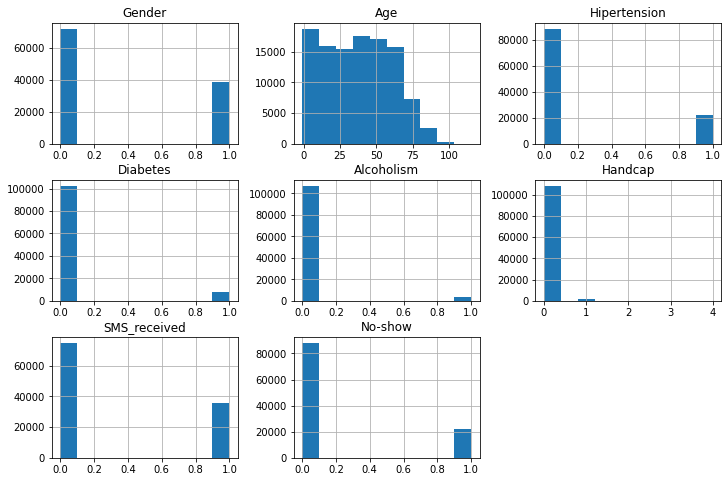

In [11]:
# visualize the distribution of data
df_new.hist(figsize=(12,8));

From the above visualization, it is clear that the instances **Handcap**, **Diabetes**, **Alcoholism** has most of the values closer to zero. So it can't have any major impact on the poeple to attend the appointment or not. So, we drop those three instances from out new dataframe

In [12]:
# drop the unwanted instances
df_show = df_new.drop(['Diabetes', 'Alcoholism', 'Handcap'], axis=1);

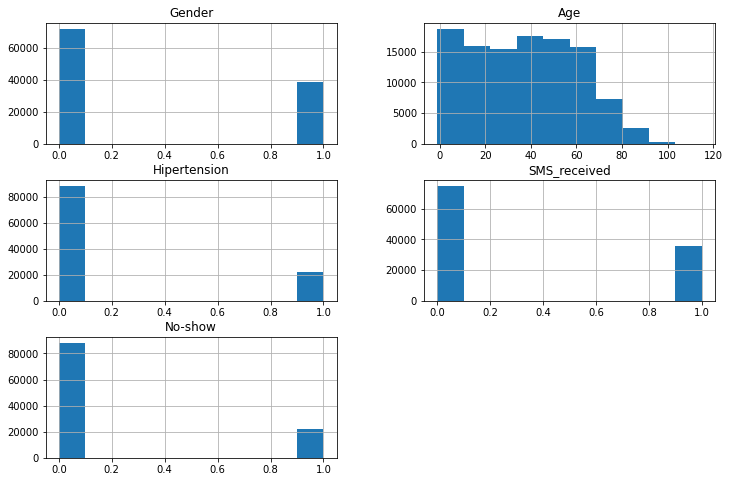

In [13]:
# visualize the distribution of data   
df_show.hist(figsize=(12,8));

In [14]:
# creating the mask for attend (0) and dont_attend (1) the appointment. 
attend = df_show['No-show'] == 0
dont_attend = df_show['No-show'] == 1

The below sections contain the analysing of our dataset with the corresponding instances and their results are discussed in the conclusion. 

In [15]:
def plot_mean(df_m, x, y, t):
    """
    This function plots the mean of given data
    param df_m   : dataframe
    param x      : Gender column 
    param y      : No-show  
    param t      : title
    """
    df_m.groupby(x)[y].mean().plot(kind= 'bar');
    plt.title(t, weight='bold')
    plt.ylabel('Mean')

In [16]:
def plotting(df_plot, x, y, t):
    """
    This function is used to plot
    param df_plot: dataframe column as series
    param x      : attend 
    param y      : dont_attend   
    param t      : title
    """
    # plotting the mask attend 
    df_plot[x].value_counts().plot(kind='bar',alpha=0.3, color= 'green', label='attend')
    
    # plotting the mask dont_attend
    df_plot[y].value_counts().plot(kind='bar',alpha=0.3, color= 'red', label='dont_attend')
    
    plt.title(t, weight='bold')
    plt.ylabel('Density')
    plt.legend(title = "No-show")

###### Analysing Gender       

In [17]:
# finding number of male (1) and female (0)
df_show.Gender.value_counts()

Gender
0    71840
1    38687
Name: count, dtype: int64

From above cell, we can see that the female count is higher than male. \
Now, finding the mean of **Gender** with respect to mask created in the above cell

In [18]:
df_show.Gender[attend].mean(), df_show.Gender[dont_attend].mean()

(0.35101124614547435, 0.346117657601147)

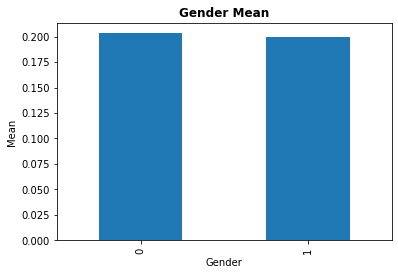

In [19]:
# grouping the Gender with respect to 'No-show'
plot_mean(df_show, 'Gender', 'No-show', 'Gender Mean')

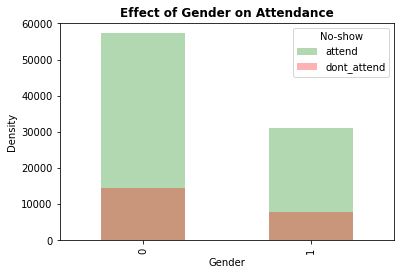

In [20]:
# visualize the Gender with mask for more understanding
plotting(df_show.Gender, attend, dont_attend, 'Effect of Gender on Attendance')

We can see that the density female(0) missing the appointment is more compared to the male(1).

###### Analysing Hipertension

In [21]:
# finding number of people with (1) and without (0) Hipertension
df_show.Hipertension.value_counts()

Hipertension
0    88726
1    21801
Name: count, dtype: int64

From above cell, we can see that the poeple with (1) Hipertension is lesser than without (0). \
Now, finding the mean of **Hipertension** with respect to mask created in the above cell

In [22]:
df_show.Hipertension[attend].mean(), df_show.Hipertension[dont_attend].mean()

(0.20439189189189189, 0.16900398763385457)

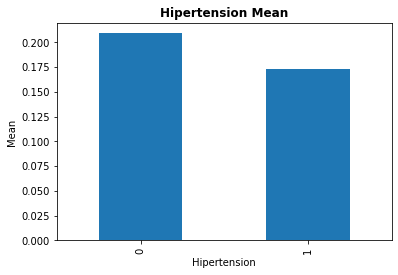

In [23]:
# grouping the Hipertension with respect to 'No-show'
plot_mean(df_show, 'Hipertension', 'No-show', 'Hipertension Mean')

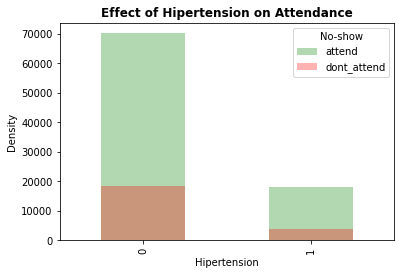

In [24]:
# visualize the Hipertension with mask for more understanding
plotting(df_show.Hipertension, attend, dont_attend, 'Effect of Hipertension on Attendance')

We can see that the density of people missing the scheduled appointment with hipertension is very less compared to people without hipertension.

###### Analysing SMS_received

In [25]:
# finding number of people received (1) and not-received (0) SMS
df_show.SMS_received.value_counts()

SMS_received
0    75045
1    35482
Name: count, dtype: int64

From above cell, we can see that the poeple who received(1) SMS is lesser than who do not received(0). \
Now, finding the mean of **SMS_received** with respect to mask created in the above cell

In [26]:
df_show.SMS_received[attend].mean(), df_show.SMS_received[dont_attend].mean()

(0.2913341193542536, 0.43837089475334917)

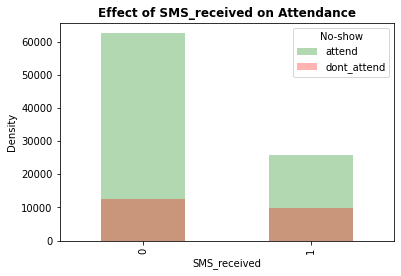

In [27]:
# visualize the SMS_received with mask for more understanding
plotting(df_show.SMS_received, attend, dont_attend, 'Effect of SMS_received on Attendance')

From the above plot, it is clear that there is nearly equal amount in missing the appointment even if they receive or don't receive the SMS.

###### Analysing Age

Finding the mean of **Age** with respect to mask created in the above cell

In [28]:
df_show.Age[attend].mean(), df_show.Age[dont_attend].mean()

(37.790064393252315, 34.31766656212196)

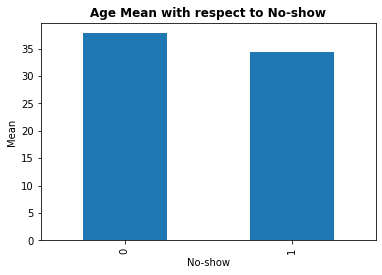

In [29]:
# grouping the No-show with respect to mean of Age
df_show.groupby('No-show').Age.mean().plot(kind='bar');
plt.title('Age Mean with respect to No-show', weight='bold')
plt.ylabel('Mean');

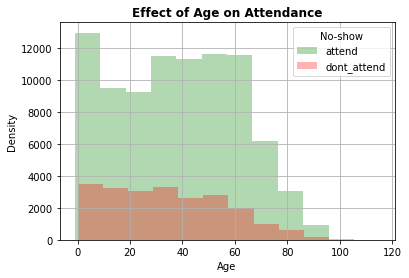

In [30]:
df_show.Age[attend].hist(bins=12, alpha=0.3, color= 'green', label='attend')
df_show.Age[dont_attend].hist(bins=12, alpha=0.3, color= 'red', label='dont_attend')
plt.title('Effect of Age on Attendance', weight='bold')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title = "No-show");

The above plot shows that there is a gradual decrease in missing (red color) the scheduled appointment when the age increase.

<a id='conclusions'></a>
## Conclusions

### Results: 
Our dataset provides the following insights regarding the appointments,

+ From section **Analysing Gender**, we can see that the female(0) misses the appointment more compared to the male(1).
+ From section **Analysing Hipertension**, we can see that the people missing the scheduled appointment with hipertension is very less compared to poeple without hipertension. i.e., people with hipertension attend the apppointment without failing much. 
+ From section **Analysing SMS_received**, there is nearly equal amount in missing the appointment even if they receive or don't receive the SMS.
+ From section **Analysing Age**, it is clear that there is a gradual decrease in missing the scheduled appointment when the age increase. It shows that the people want to stay healthy when they get older. 




+ From the above exploration, we can conclude that the factors **Age** and **Hipertension** show significant changes on the independent varibale **No-show**. 


### Limitations: 
There are a couple of limitations with our data such as,
+ It will be quite efficient to analysis if there more quatitative data. 
+ There are some column like **Neighbourhood** is not much helpful in our analysis.
+ The PatientID doesn't have any patient name, otherwise we can even explore more with respect to common PatientID and Name.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1